<a href="https://colab.research.google.com/github/bochap-opensource/ngms-careerday/blob/main/ngms_software_engineer_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import asyncio
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import requests
import sys
import time
from IPython.display import Audio, display

# Set font to a font that supports emojis (e.g., Noto Sans, Symbola, Segoe UI Emoji)
plt.rcParams['font.family'] = 'DejaVu Sans' # Alternative: 'Noto Sans'
plt.rcParams['axes.unicode_minus'] = False  # Keep minus sign support


# Create the directory if it doesn't exist
data_dir = '/content/data'
os.makedirs(data_dir, exist_ok=True)

# URLs for the images (assuming they are in the same public GitHub repo)
base_url = "https://github.com/bochap-opensource/ngms-careerday/raw/main/data/"
security_key_url = base_url + "security_key.png"
security_lock_url = base_url + "security_lock.png"

#print(f"Downloading {security_key_url}...")
key_path = os.path.join(data_dir, 'security_key.png')
response = requests.get(security_key_url)
if response.status_code == 200:
    with open(key_path, 'wb') as f:
        f.write(response.content)
    #print(f"Successfully downloaded {key_path}")
else:
    print(f"Failed to download {security_key_url}. Status code: {response.status_code}")

#print(f"Downloading {security_lock_url}...")
lock_path = os.path.join(data_dir, 'security_lock.png')
response = requests.get(security_lock_url)
if response.status_code == 200:
    with open(lock_path, 'wb') as f:
        f.write(response.content)
    #print(f"Successfully downloaded {lock_path}")
else:
    print(f"Failed to download {security_lock_url}. Status code: {response.status_code}")

#print("Image download process complete. Please re-run the Vault initialization cell now.")

# --- 🕵️ MISSION CONTROL CENTER (ASYNCIO) 🕵️ ---
# ==========================================
# FUNCTION 1: THE AUDIO TRANSMISSION (60s)
# ==========================================
def activate_mission_audio():
    """Generates and plays a synchronized 60-second background track."""
    print("📡 ESTABLISHING SECURE AUDIO LINK...", flush=True)

    rate = 22050
    bpm = 160
    beat_dur = 60 / bpm

    # 2 LOOPS = Exactly 60 seconds total runtime
    LOOP_COUNT = 3

    # --- SYNTHESIS ENGINES ---
    def smooth_tone(freq, dur, vol=0.1):
        if freq == 0: return np.zeros(int(rate * dur))
        t = np.linspace(0, dur, int(rate * dur), False)
        wave = np.sin(2 * np.pi * freq * t)
        fade_len = int(0.2 * rate * dur)
        if len(wave) > 2 * fade_len:
            wave[:fade_len] *= np.linspace(0, 1, fade_len)
            wave[-fade_len:] *= np.linspace(1, 0, fade_len)
        return wave * vol

    def shaker(dur, vol=0.015):
        noise = np.random.uniform(-1, 1, int(rate * dur))
        decay = np.linspace(1, 0, len(noise)) ** 2
        return noise * decay * vol

    # --- NOTES & PATTERNS ---
    G2, Bb2, C3, F2, Fs2 = 98.00, 116.54, 130.81, 87.31, 92.50
    G3, C4 = 196.00, 261.63
    G4, Bb4, C5, F4, Fs4 = 392.00, 466.16, 523.25, 349.23, 369.99

    def get_bass(variant='A'):
        d_long, d_short = beat_dur * 1.5, beat_dur * 1.0
        if variant == 'A': return np.concatenate([smooth_tone(G2, d_long), smooth_tone(G2, d_long), smooth_tone(Bb2, d_short), smooth_tone(C3, d_short)])
        return np.concatenate([smooth_tone(G2, d_long), smooth_tone(G2, d_long), smooth_tone(F2, d_short), smooth_tone(Fs2, d_short)])

    def get_melody(part):
        bar_len = int(rate * beat_dur * 5)
        if part == 'Silence': return np.zeros(bar_len)
        elif part == 'Theme_A':
            d = np.concatenate([smooth_tone(G4, beat_dur*3.0, 0.06), smooth_tone(Bb4, beat_dur*1.0, 0.06), smooth_tone(C5, beat_dur*1.0, 0.06)])
            return np.append(d, np.zeros(max(0, bar_len - len(d))))
        elif part == 'Theme_B':
            d = np.concatenate([smooth_tone(G4, beat_dur*3.0, 0.06), smooth_tone(F4, beat_dur*1.0, 0.06), smooth_tone(Fs4, beat_dur*1.0, 0.06)])
            return np.append(d, np.zeros(max(0, bar_len - len(d))))

    def get_bridge_bar():
        bar_len = int(rate * beat_dur * 5)
        d = np.concatenate([smooth_tone(G4, beat_dur*1.5, 0.05), smooth_tone(Fs4, beat_dur*1.5, 0.05), smooth_tone(F4, beat_dur*2.0, 0.05)])
        return np.append(d, np.zeros(max(0, bar_len - len(d))))

    def get_drums():
        hit = np.concatenate([shaker(beat_dur/2), np.zeros(int(rate * beat_dur/2))])
        return np.tile(hit, 5)

    # --- ARRANGEMENT ---
    # 1. INTRO
    seq_bass = np.concatenate([get_bass('A'), get_bass('B')] * 2)
    seq_melody = np.concatenate([get_melody('Silence')] * 4)
    seq_drums = np.concatenate([get_drums()] * 4)

    # 2. MAIN LOOPS
    block_bass = np.array([])
    block_melody = np.array([])
    block_drums = np.array([])
    for _ in range(2):
        block_bass = np.concatenate([block_bass, get_bass('A'), get_bass('B')]) if len(block_bass) else np.concatenate([get_bass('A'), get_bass('B')])
        block_melody = np.concatenate([block_melody, get_melody('Theme_A'), get_melody('Theme_B')]) if len(block_melody) else np.concatenate([get_melody('Theme_A'), get_melody('Theme_B')])
        block_drums = np.concatenate([block_drums, get_drums(), get_drums()]) if len(block_drums) else np.concatenate([get_drums(), get_drums()])
    for _ in range(2):
        block_bass = np.concatenate([block_bass, get_bass('A'), get_bass('B')])
        block_melody = np.concatenate([block_melody, get_bridge_bar(), get_bridge_bar()])
        block_drums = np.concatenate([block_drums, get_drums(), get_drums()])

    seq_bass = np.concatenate([seq_bass, np.tile(block_bass, LOOP_COUNT)])
    seq_melody = np.concatenate([seq_melody, np.tile(block_melody, LOOP_COUNT)])
    seq_drums = np.concatenate([seq_drums, np.tile(block_drums, LOOP_COUNT)])

    # 3. FINALE
    seq_bass = np.concatenate([seq_bass, smooth_tone(G2, 0.5), smooth_tone(G2, 0.5), smooth_tone(C3, 3.0)])
    seq_melody = np.concatenate([seq_melody, smooth_tone(G3, 0.5), smooth_tone(G3, 0.5), smooth_tone(C4, 3.0)])
    seq_drums = np.concatenate([seq_drums, np.zeros(int(rate * 4.0))])

    # MIX
    L = min(len(seq_bass), len(seq_melody), len(seq_drums))
    final_mix = (seq_bass[:L] + seq_melody[:L] + seq_drums[:L]) * 0.05 # 5% Volume

    display(Audio(final_mix, rate=rate, autoplay=True))


# ==========================================
# FUNCTION 2: THE TEXT TRANSMISSION (REDUCED CONTENT)
# ==========================================
async def display_mission_briefing():
    """Prints the story asynchronously using asyncio.sleep."""

    BOLD = "\033[1m"
    END = "\033[0m"

    # REDUCED TEXT (~50% shorter)
    message = f"""
Good day, {BOLD}Junior Software Engineers{END}.

I have received an urgent message from {BOLD}Principal Gilbert{END}.

It is {BOLD}3:40 PM{END}. The final bell rings in {BOLD}20{END} minutes.
The buses are waiting. The parents are waiting.
But the {BOLD}Master Key{END} is gone.

A notorious cyber-villain known only as {BOLD}'Dr. 67'{END} has hacked the school's vault.
Dr. 67 doesn't believe in summer break, weekends, or going home.
He wants school to last... {BOLD}forever{END}.

He trapped the key inside a {BOLD}Quantum Matrix Vault{END} protected by
6 layers of high-level encryption.

If we don't unlock this vault in the next 20 minutes, the bell will never ring.
You will be stuck here. The buses will leave without you.
And your parents? They will be circling the parking lot until they run out of gas.

This is where {BOLD}YOU{END} come in.

Dr. 67 made one mistake. He built his vault using {BOLD}Logic and Math{END}—
the two things he thought 7th graders didn't know how to use.

You are the Engineering Team. Your weapon is not a hammer or a laser...
it is {BOLD}Python Code{END}.

I have established a secure link to the vault.
Your mission, should you choose to accept it, is to write the code that
solves Dr. 67's riddles, breaks the encryption, and reveals the key to save the afternoon.

Open your laptops. Crack your knuckles.

{BOLD}Let's hack the vault.{END}
"""
    # Wait for audio to initialize
    await asyncio.sleep(2)

    # Title Animation
    print(f"\n{BOLD}⚠️  INCOMING TOP SECRET TRANSMISSION  ⚠️{END}", end="")
    for _ in range(3):
        await asyncio.sleep(0.5)
        print(".", end="")
        sys.stdout.flush()
    print("\n" + "="*45)

    # Typewriter Effect
    i = 0
    while i < len(message):
        if message[i:i+2] == '\033':
            end_code = message.find('m', i)
            if end_code != -1:
                print(message[i:end_code+1], end='')
                i = end_code + 1
                continue

        print(message[i], end='')
        sys.stdout.flush()

        # SPEED CALIBRATION
        # 0.04s per letter is slower/dramatic but safe because text is short
        if message[i] in [' ', '\n']:
            await asyncio.sleep(0.01)
        else:
            await asyncio.sleep(0.04)
        i += 1

    print("\n" + "="*45)
    print(f"{BOLD}END OF TRANSMISSION{END}")

<img src="https://github.com/bochap-opensource/ngms-careerday/blob/main/data/genedx-logo.png?raw=true" width="200" />

When you think of a Software Engineer, you probably imagine someone coding video games, social media apps, or websites. But did you know that code can actually save lives?

I work as a Software Engineer at a company called **GeneDx**. We are like detectives, but instead of fingerprints, we look at **DNA** to help doctors figure out why someone might be sick with a rare or complex condition.

Here is how a Software Engineer fits into that picture:

- **We Build the Super-Tools**: DNA is made up of billions of tiny pieces of information. No human could read through it all! My job is to write the code for our special platform, GeneDx Infinity. Think of it as a super-powered search engine that helps doctors scan through massive amounts of data to find the one tiny change in a person's genes that is causing a health problem.

- **We Manage "Big Data"**: GeneDx has run over 2.5 million tests! That is a mountain of information. Software Engineers build the systems that store, protect, and organize all that data so it’s ready to use the second a doctor needs it.

- **We Speed Up Answers:** When a patient is sick, every minute counts. We write programs that analyze genetic data faster and more accurately, helping families get the answers they need to start the right treatment sooner.

So, being a Software Engineer isn't just about sitting at a computer; it's about using logic and code to solve medical mysteries and help people live healthier lives.

# The Mission Briefing

In [66]:
# ==========================================
# EXECUTE MISSION BRIEFING
# ==========================================
# 1. Trigger Audio
activate_mission_audio()

# 2. Await the text transmission
await display_mission_briefing()

📡 ESTABLISHING SECURE AUDIO LINK...



⚠️  INCOMING TOP SECRET TRANSMISSION  ⚠️...

Good day, Junior Software Engineers.

I have received an urgent message from Principal Gilbert.

It is 3:40 PM. The final bell rings in 20 minutes.
The buses are waiting. The parents are waiting.
But the Master Key is gone.

A notorious cyber-villain known only as 'Dr. 67' has hacked the school's vault.
Dr. 67 doesn't believe in summer break, weekends, or going home.
He wants school to last... forever.

He trapped the key inside a Quantum Matrix Vault protected by 
6 layers of high-level encryption.

If we don't unlock this vault in the next 20 minutes, the bell will never ring.
You will be stuck here. The buses will leave without you.
And your parents? They will be circling the parking lot until they run out of gas.

This is where YOU come in.

Dr. 67 made one mistake. He built his vault using Logic and Math—
the two things he thought 7th graders didn't know how to use.

You are the Engineering Team. Your weapon is not a hammer or a laser.

In [58]:
# --- 🕵️ MISSION CONTROL CENTER (ASYNCIO VERSION) 🕵️ ---
import numpy as np
import asyncio
import sys
from IPython.display import Audio, display

# ==========================================
# FUNCTION 1: THE AUDIO TRANSMISSION (60s)
# ==========================================
def activate_mission_audio():
    """Generates and plays a synchronized 60-second background track."""
    rate = 22050
    bpm = 160
    beat_dur = 60 / bpm

    # 3 LOOPS = Exactly 60 seconds total runtime
    LOOP_COUNT = 3

    # --- SYNTHESIS ENGINES ---
    def smooth_tone(freq, dur, vol=0.1):
        if freq == 0: return np.zeros(int(rate * dur))
        t = np.linspace(0, dur, int(rate * dur), False)
        wave = np.sin(2 * np.pi * freq * t)
        fade_len = int(0.2 * rate * dur)
        if len(wave) > 2 * fade_len:
            wave[:fade_len] *= np.linspace(0, 1, fade_len)
            wave[-fade_len:] *= np.linspace(1, 0, fade_len)
        return wave * vol

    def shaker(dur, vol=0.015):
        noise = np.random.uniform(-1, 1, int(rate * dur))
        decay = np.linspace(1, 0, len(noise)) ** 2
        return noise * decay * vol

    # --- NOTES & PATTERNS ---
    G2, Bb2, C3, F2, Fs2 = 98.00, 116.54, 130.81, 87.31, 92.50
    G3, C4 = 196.00, 261.63
    G4, Bb4, C5, F4, Fs4 = 392.00, 466.16, 523.25, 349.23, 369.99

    def get_bass(variant='A'):
        d_long, d_short = beat_dur * 1.5, beat_dur * 1.0
        if variant == 'A': return np.concatenate([smooth_tone(G2, d_long), smooth_tone(G2, d_long), smooth_tone(Bb2, d_short), smooth_tone(C3, d_short)])
        return np.concatenate([smooth_tone(G2, d_long), smooth_tone(G2, d_long), smooth_tone(F2, d_short), smooth_tone(Fs2, d_short)])

    def get_melody(part):
        bar_len = int(rate * beat_dur * 5)
        if part == 'Silence': return np.zeros(bar_len)
        elif part == 'Theme_A':
            d = np.concatenate([smooth_tone(G4, beat_dur*3.0, 0.06), smooth_tone(Bb4, beat_dur*1.0, 0.06), smooth_tone(C5, beat_dur*1.0, 0.06)])
            return np.append(d, np.zeros(max(0, bar_len - len(d))))
        elif part == 'Theme_B':
            d = np.concatenate([smooth_tone(G4, beat_dur*3.0, 0.06), smooth_tone(F4, beat_dur*1.0, 0.06), smooth_tone(Fs4, beat_dur*1.0, 0.06)])
            return np.append(d, np.zeros(max(0, bar_len - len(d))))

    def get_bridge_bar():
        bar_len = int(rate * beat_dur * 5)
        d = np.concatenate([smooth_tone(G4, beat_dur*1.5, 0.05), smooth_tone(Fs4, beat_dur*1.5, 0.05), smooth_tone(F4, beat_dur*2.0, 0.05)])
        return np.append(d, np.zeros(max(0, bar_len - len(d))))

    def get_drums():
        hit = np.concatenate([shaker(beat_dur/2), np.zeros(int(rate * beat_dur/2))])
        return np.tile(hit, 5)

    # --- ARRANGEMENT ---
    # 1. INTRO
    seq_bass = np.concatenate([get_bass('A'), get_bass('B')] * 2)
    seq_melody = np.concatenate([get_melody('Silence')] * 4)
    seq_drums = np.concatenate([get_drums()] * 4)

    # 2. MAIN LOOPS
    block_bass = np.array([])
    block_melody = np.array([])
    block_drums = np.array([])
    for _ in range(2):
        block_bass = np.concatenate([block_bass, get_bass('A'), get_bass('B')]) if len(block_bass) else np.concatenate([get_bass('A'), get_bass('B')])
        block_melody = np.concatenate([block_melody, get_melody('Theme_A'), get_melody('Theme_B')]) if len(block_melody) else np.concatenate([get_melody('Theme_A'), get_melody('Theme_B')])
        block_drums = np.concatenate([block_drums, get_drums(), get_drums()]) if len(block_drums) else np.concatenate([get_drums(), get_drums()])
    for _ in range(2):
        block_bass = np.concatenate([block_bass, get_bass('A'), get_bass('B')])
        block_melody = np.concatenate([block_melody, get_bridge_bar(), get_bridge_bar()])
        block_drums = np.concatenate([block_drums, get_drums(), get_drums()])

    seq_bass = np.concatenate([seq_bass, np.tile(block_bass, LOOP_COUNT)])
    seq_melody = np.concatenate([seq_melody, np.tile(block_melody, LOOP_COUNT)])
    seq_drums = np.concatenate([seq_drums, np.tile(block_drums, LOOP_COUNT)])

    # 3. FINALE
    seq_bass = np.concatenate([seq_bass, smooth_tone(G2, 0.5), smooth_tone(G2, 0.5), smooth_tone(C3, 3.0)])
    seq_melody = np.concatenate([seq_melody, smooth_tone(G3, 0.5), smooth_tone(G3, 0.5), smooth_tone(C4, 3.0)])
    seq_drums = np.concatenate([seq_drums, np.zeros(int(rate * 4.0))])

    # MIX
    L = min(len(seq_bass), len(seq_melody), len(seq_drums))
    final_mix = (seq_bass[:L] + seq_melody[:L] + seq_drums[:L]) * 0.05 # 5% Volume

    display(Audio(final_mix, rate=rate, autoplay=True))


# ==========================================
# FUNCTION 2: THE TEXT TRANSMISSION (ASYNC)
# ==========================================
async def display_mission_briefing():
    """Prints the story asynchronously using asyncio.sleep."""

    BOLD = "\033[1m"
    END = "\033[0m"

    message = f"""
Good day, Agents. Or should I say... {BOLD}Junior Software Engineers{END}.

I have just received an urgent encrypted message from the frantic office of {BOLD}Principal Gilbert{END}.

Here is the situation:
It is {BOLD}3:40 PM{END}. In exactly {BOLD}20{END} minutes, the final bell is supposed to ring.
Outside, the {BOLD}School Bus lanes{END} are lined up like yellow dominoes.
In the {BOLD}Carpool Lane{END}, hundreds of parents are sitting in their minivans,
checking their watches, and slowly losing their minds.

Principal Gilbert rushed to the Announcement Room to grab the {BOLD}Master Key{END}—
the digital key that triggers the dismissal bell and releases you all to freedom.

But the key is gone.

A notorious cyber-villain known only as {BOLD}'Dr. 67'{END} has hacked the school's vault.
Dr. 67 doesn't believe in summer break, weekends, or going home.
He wants school to last... {BOLD}forever{END}.

He has trapped the Master Key inside a {BOLD}Quantum Matrix Vault{END}—
a digital lock so complex that no human hand can open it.
It is protected by 6 layers of high-level encryption.

If we don't unlock this vault in the next 20 minutes, the bell will never ring.
You will be stuck here. The buses will leave without you.
And your parents? They will be circling the parking lot until they run out of gas.

This is where {BOLD}YOU{END} come in.

Dr. 67 made one mistake. He built his vault using {BOLD}Logic and Math{END}—
the two things he thought 7th graders didn't know how to use.

You are the Engineering Team. Your weapon is not a hammer or a laser...
it is {BOLD}Python Code{END}.

I have established a secure link to the vault.
Your mission, should you choose to accept it, is to write the code that
solves Dr. 67's riddles, breaks the encryption, and reveals the key to save the afternoon.

Open your laptops. Crack your knuckles.

{BOLD}Let's hack the vault.{END}
"""
    # Wait for audio to initialize (Non-blocking sleep)
    await asyncio.sleep(2)

    # Title Animation
    print(f"\n{BOLD}⚠️  INCOMING TOP SECRET TRANSMISSION  ⚠️{END}", end="")
    for _ in range(3):
        await asyncio.sleep(0.5)
        print(".", end="")
        sys.stdout.flush()
    print("\n" + "="*45)

    # Typewriter Effect
    i = 0
    while i < len(message):
        if message[i:i+2] == '\033':
            end_code = message.find('m', i)
            if end_code != -1:
                print(message[i:end_code+1], end='')
                i = end_code + 1
                continue

        print(message[i], end='')
        sys.stdout.flush()

        # SPEED CALIBRATION (0.03s)
        if message[i] in [' ', '\n']:
            await asyncio.sleep(0.01)
        else:
            await asyncio.sleep(0.03)
        i += 1

    print("\n" + "="*45)
    print(f"{BOLD}END OF TRANSMISSION{END}")

# ==========================================
# EXECUTE MISSION (ASYNCIO)
# ==========================================
print("📡 ESTABLISHING SECURE AUDIO LINK...", flush=True)

# 1. Trigger Audio (This is fast and hands off to the browser immediately)
activate_mission_audio()

# 2. Await the text transmission (Colab supports top-level await)
await display_mission_briefing()

📡 ESTABLISHING SECURE AUDIO LINK...



⚠️  INCOMING TOP SECRET TRANSMISSION  ⚠️...

Good day, Agents. Or should I say... Junior Software Engineers.

I have just received an urgent encrypted message from the frantic office of Principal Gilbert.

Here is the situation:
It is 3:40 PM. In exactly 20 minutes, the final bell is supposed to ring.
Outside, the School Bus lanes are lined up like yellow dominoes.
In the Carpool Lane, hundreds of parents are sitting in their minivans,
checking their watches, and slowly losing their minds.

Principal Gilbert rushed to the Announcement Room to grab the Master Key—
the digital key that triggers the dismissal bell and releases you all to freedom.

But the key is gone.

A notorious cyber-villain known only as 'Dr. 67' has hacked the school's vault.
Dr. 67 doesn't believe in summer break, weekends, or going home.
He wants school to last... forever.

He has trapped the Master Key inside a Quantum Matrix Vault—
a digital lock so complex that no human hand can open it.
It is protected by 6 la

✅ Vault ONLINE. Security protocols active.


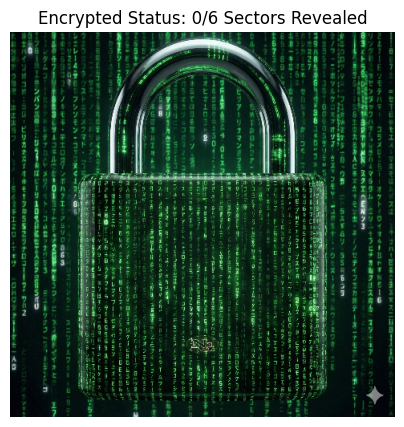

In [38]:
# --- THE GAME ENGINE (DO NOT EDIT THIS CELL) ---
class Vault:
    def __init__(self):
        # Paths to images in the local data folder
        self.secret_path = '/content/data/security_key.png'
        self.lock_path = '/content/data/security_lock.png'

        try:
            self.secret_img = mpimg.imread(self.secret_path)
            self.lock_img_raw = mpimg.imread(self.lock_path)

            dsize = (self.secret_img.shape[1], self.secret_img.shape[0])
            self.lock_img = cv2.resize(self.lock_img_raw, dsize)

            if self.secret_img.shape[2] == 3:
                alpha = np.ones((self.secret_img.shape[0], self.secret_img.shape[1], 1), dtype=self.secret_img.dtype)
                self.secret_img = np.concatenate((self.secret_img, alpha), axis=2)

            if self.lock_img.shape[2] == 3:
                alpha = np.ones((self.lock_img.shape[0], self.lock_img.shape[1], 1), dtype=self.lock_img.dtype)
                self.lock_img = np.concatenate((self.lock_img, alpha), axis=2)

            self.display_img = self.lock_img.copy()
            self.rows, self.cols, _ = self.secret_img.shape
            self.r_step = self.rows // 3
            self.c_step = self.cols // 2
            self.unlocked_count = 0
            self.sections = {
                1: (0, self.r_step, 0, self.c_step),
                2: (0, self.r_step, self.c_step, self.cols),
                3: (self.r_step, self.r_step*2, 0, self.c_step),
                4: (self.r_step, self.r_step*2, self.c_step, self.cols),
                5: (self.r_step*2, self.rows, 0, self.c_step),
                6: (self.r_step*2, self.rows, self.c_step, self.cols),
            }
            print("✅ Vault ONLINE. Security protocols active.")
            self._display()
        except Exception as e:
            print(f"❌ CONNECTION ERROR: {e}")

    def check_code(self, challenge_number, student_answer, expected_answer):
        print(f"--- Verifying Security Clearance {challenge_number} ---")

        is_correct = False
        if isinstance(expected_answer, float):
             is_correct = abs(student_answer - expected_answer) < 0.01
        else:
             is_correct = student_answer == expected_answer

        if is_correct:
            print(f"ACCESS GRANTED. Decrypting Sector {challenge_number}...")
            r1, r2, c1, c2 = self.sections[challenge_number]
            self.display_img[r1:r2, c1:c2] = self.secret_img[r1:r2, c1:c2]
            self.unlocked_count += 1

            # --- MISSION 6 TRAP ---
            if challenge_number == 6:
                self._display()
                print("\n⚠️ SYSTEM ALERT: ANOMALY DETECTED!")
                time.sleep(1)
                print("Dr. 67 has triggered the 'Dead Man's Switch'...")
                time.sleep(1)

                # RE-LOCK THE VAULT
                self.display_img = self.lock_img.copy()
                self._display()

                print("❌ SYSTEM LOCKED.")
                print("---------------------------------------------------")
                print("HIDDEN MISSION: VISUAL DECRYPTION")
                print("Dr. 67 hid the password inside a visual data stream.")
                print("Analyze the graph below to find the algorithm.")
                print("---------------------------------------------------")
                self._generate_firewall_graph()
            else:
                self._display()
        else:
            print(f"ACCESS DENIED. Calculated: {student_answer}. Expected: {expected_answer}")

    def _generate_firewall_graph(self):
        # Create a Linear Graph (y = 3x + 5)
        x = np.array([0, 1, 2, 3, 4, 5])
        y = 3 * x + 5

        plt.figure(figsize=(6, 4))
        plt.plot(x, y, color='red', linewidth=3, marker='o', markersize=10, label='Encryption Key')

        # Grid settings to make it easy for students to count
        plt.grid(True, which='both', linestyle='--', linewidth=0.7)
        plt.xticks(np.arange(0, 6, 1))
        plt.yticks(np.arange(0, 25, 5))
        plt.xlabel("Input (x)")
        plt.ylabel("Output (y)")
        plt.title("🔥 FIREWALL DATA STREAM 🔥")
        plt.legend()
        plt.show()

    def check_final_boss(self, student_function):
        print("--- INJECTING CODE INTO FIREWALL ---")

        # We test their function against 3 different inputs to ensure they got the math right
        # Equation is y = 3x + 5
        test_inputs = [0, 2, 10]
        expected_outputs = [5, 11, 35]

        passed = True
        for i, val in enumerate(test_inputs):
            try:
                result = student_function(val)
                print(f"Testing Input {val}... Your Result: {result} | Expected: {expected_outputs[i]}")
                if result != expected_outputs[i]:
                    passed = False
                    break
            except Exception as e:
                print(f"❌ CODE ERROR: {e}")
                passed = False
                break

        if passed:
            print("\n🔥 SUCCESS! FIREWALL DESTROYED.")
            print("Restoring Master Key...")
            self.display_img = self.secret_img.copy()
            self._display()
            print("🎉 MISSION ACCOMPLISHED! The school day is saved!")
        else:
            print("\n❌ OVERRIDE FAILED. Your function does not match the graph.")
            print("Hint: Check the y-intercept (where the line starts) and the slope (rise over run).")

    def _display(self):
        plt.figure(figsize=(5, 5))
        plt.imshow(self.display_img)
        plt.axis('off')

        # Check if we are in the "Trap" state (6 unlocked but image is locked)
        # We use a simple pixel check to see if it matches the lock image
        if self.unlocked_count >= 6 and np.array_equal(self.display_img, self.lock_img):
             plt.title("⛔ SECURITY LOCKDOWN ⛔")
        else:
             plt.title(f"Encrypted Status: {self.unlocked_count}/6 Sectors Revealed")
        plt.show()

# Initialize Game
vault = Vault()

--- Verifying Security Clearance 1 ---
ACCESS GRANTED. Decrypting Sector 1...


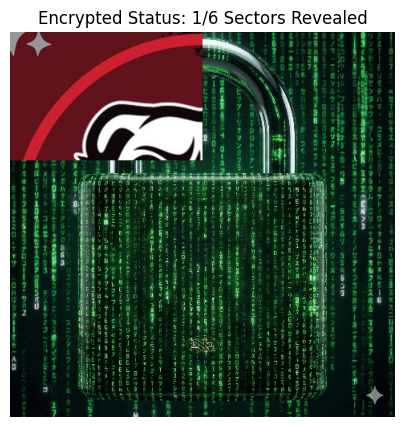

In [39]:
# === MISSION 1: INTAKE PROTOCOL ===
# The system needs a basic power surge to start.
# REQUIREMENT: Start with a base energy level of 15, and add 27 to it.

# 💡 HINT: In Python, we use the '+' symbol for addition.
# Example: result = 5 + 5

def calculate_total():
    # TODO: Erase the 0 and write the math to add 15 and 27
    result = 0 # <--- FIX THIS LINE
    result = 15 + 27
    return result

# Run security check
vault.check_code(1, calculate_total(), 42)

--- Verifying Security Clearance 2 ---
ACCESS GRANTED. Decrypting Sector 2...


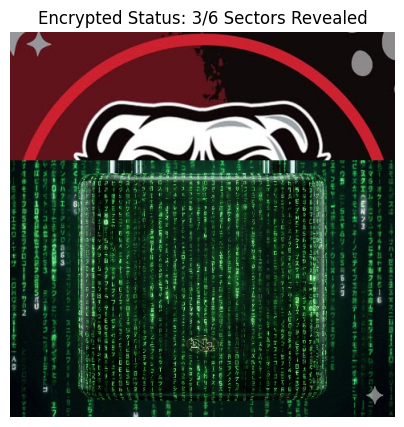

In [41]:
# === MISSION 2: MEMORY ALLOCATION ===
# We need to clear a rectangular block of memory in the system.
# REQUIREMENT: Calculate the AREA of a block that is 8 units wide and 9 units tall.

# 💡 HINT: The math formula for Area is Width times Height.
# In Python, the multiplication symbol is an asterisk: *
# Example: area = 5 * 5

def calculate_area(width, height):
    # TODO: Write the formula using the width and height variables
    area = 0 # <--- FIX THIS LINE
    area = width * height
    return area

# Run security check
vault.check_code(2, calculate_area(8, 9), 72)

--- Verifying Security Clearance 3 ---
ACCESS GRANTED. Decrypting Sector 3...


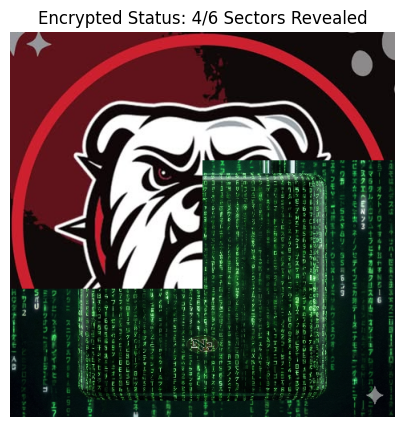

In [42]:
# === MISSION 3: DECRYPTION LOGIC ===
# The security key is scrambled. Follow the exact order to unscramble it.
# REQUIREMENT: Take the number 5, add 3 to it, AND THEN multiply that total result by 10.

# 💡 HINT: Computers follow PEMDAS. If you want addition to happen BEFORE
# multiplication, you must use parentheses ( ) around the addition part.
# Example: (2 + 2) * 5 is different than 2 + 2 * 5

def decrypt_key():
    # TODO: Write code to: (5 plus 3) times 10
    key = 0
    key = (5 + 3) * 10
    return key

# Run security check
vault.check_code(3, decrypt_key(), 80)

--- Verifying Security Clearance 4 ---
ACCESS GRANTED. Decrypting Sector 4...


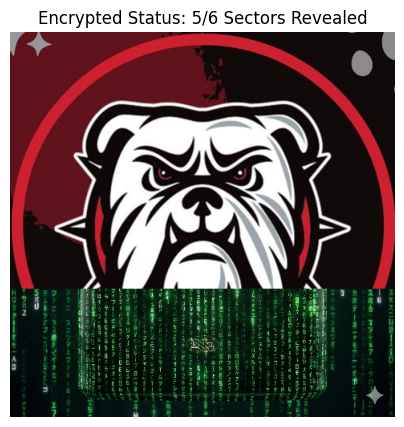

In [43]:
# === MISSION 4: DATA DISTRIBUTION ===
# We have 25 data packets and need to split them evenly across 4 servers.
# REQUIREMENT: Calculate how many packets are left over after dividing.

# 💡 HINT: This isn't normal division! We need the REMAINDER.
# In Python, the '%' symbol is the "Remainder Machine".
# Example: 10 % 3 would equal 1 (because 3 goes into 10 three times with 1 left over).

def find_remainder():
    # TODO: Return the remainder of 25 divided by 4 using %
    leftover = 0 # <--- FIX THIS LINE
    leftover = 25 % 4
    return leftover

# Run security check
vault.check_code(4, find_remainder(), 1)

--- Verifying Security Clearance 5 ---
ACCESS GRANTED. Decrypting Sector 5...


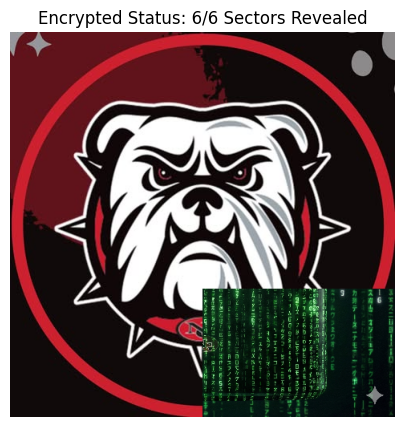

In [44]:
# === MISSION 5: COOLING SYSTEM ===
# The processor is overheating at 200 speed.
# REQUIREMENT: We need to reduce the speed to 50% of its current power.

# 💡 HINT: To find a percentage of a number, convert the percentage to a decimal
# and multiply.
# 50% as a decimal is 0.5.

def calculate_half_power(current_speed):
    # TODO: Multiply current_speed by 0.5
    new_speed = 0 # <--- FIX THIS LINE
    new_speed = current_speed * 0.5
    return new_speed

# Run security check
vault.check_code(5, calculate_half_power(200), 100)

--- Verifying Security Clearance 6 ---
ACCESS GRANTED. Decrypting Sector 6...


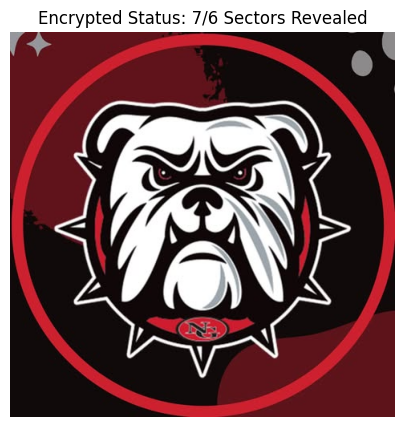


⚠️ SYSTEM ALERT: ANOMALY DETECTED!
Dr. 67 has triggered the 'Dead Man's Switch'...


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9940 (\N{NO ENTRY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


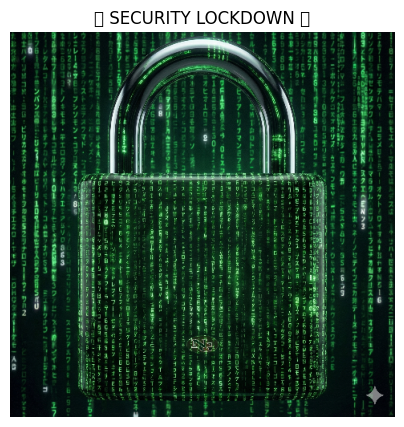

❌ SYSTEM LOCKED.
---------------------------------------------------
HIDDEN MISSION: VISUAL DECRYPTION
Dr. 67 hid the password inside a visual data stream.
Analyze the graph below to find the algorithm.
---------------------------------------------------


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


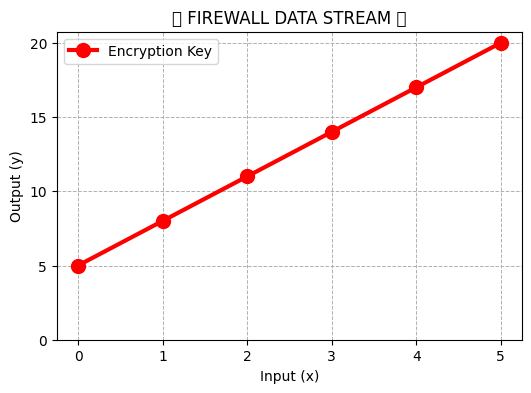

In [45]:
# === MISSION 6: FINAL BYPASS ===
# To break the final layer of the Matrix lock, we need an exponential surge.
# REQUIREMENT: Calculate 12 squared (12 to the power of 2).

# 💡 HINT: "Squared" means multiplying a number by itself (e.g., 12 * 12).
# Python also has a cool power operator: **
# Example: 5 squared is written as: 5 ** 2

def calculate_power():
    # TODO: Return 12 squared
    power = 0 # <--- FIX THIS LINE
    power = 12 ** 2
    return power

# Run security check
vault.check_code(6, calculate_power(), 144)

--- ATTEMPTING FINAL SYSTEM OVERRIDE ---
Input: 47 | Target: 47

🔥 SUCCESS! FIREWALL DESTROYED.
Restoring Master Key...


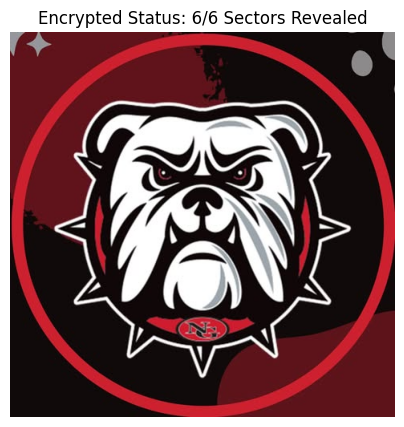

🎉 MISSION ACCOMPLISHED! The school day is saved!


In [28]:
# === 🚨 HIDDEN MISSION: VISUAL REVERSE ENGINEERING 🚨 ===
# The system is locked, but Dr. 67 left a trace: the RED GRAPH above.
# This graph represents the encryption key.

# YOUR TASK:
# 1. Look at the Red Graph above.
# 2. Find the Slope (m) -> How much does 'y' go up when 'x' moves over 1?
# 3. Find the Y-Intercept (b) -> Where does the line start on the vertical axis?
# 4. Write the Python code to match that line.

def break_firewall(x):
    # TODO: Change m and b to the numbers you found in the graph!
    m = 0
    b = 0

    # The linear equation formula
    y = (m * x) + b
    return y

# Run the final override
vault.check_final_boss(break_firewall)